In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
dados_clientes = pd.read_csv("C:/Projetos Pessoais/DataScience/segmentacao_Clientes_Ecomerce/data/dados_clientes_clusterizadosTESTE.csv")

In [20]:
dados_insight = pd.read_csv("C:/Projetos Pessoais/DataScience/segmentacao_Clientes_Ecomerce/data/dados_para_avaliacao_final.csv")

In [21]:
dados_insight.set_index('Cod_cliente', inplace = True)
dados_insight

,Unnamed: 0,Ultima_Compra,Total_transacoes,Valor_total_gasto,Avg_transacao,diversidade_produtos,Dia_fav_compra,UK,Gastos_medios_mensais,Desvio_padrao_gastos_mensais,Tendencia_gastos
Cod_cliente,,,,,,,,,,,
12347,0,2,182,4310.00,23.68,103,1,0,615.714286,341.070789,4.486071
12348,1,75,27,1437.24,53.23,21,3,0,359.310000,203.875689,-100.884000
12349,2,18,72,1457.55,20.24,72,0,0,1457.550000,0.000000,0.000000
12350,3,310,16,294.40,18.40,16,2,0,294.400000,0.000000,0.000000
12352,4,36,77,1385.74,18.00,57,1,0,346.435000,120.042154,-2.682000
...,...,...,...,...,...,...,...,...,...,...,...
21821,5505,1,2,3.35,1.68,2,3,1,3.350000,0.000000,0.000000
21822,5506,1,634,5699.00,8.99,634,3,1,5699.000000,0.000000,0.000000
21823,5507,0,730,6756.06,9.25,730,4,1,6756.060000,0.000000,0.000000


In [9]:
dados_clientes.set_index('Cod_cliente', inplace = True)
dados_clientes

,Ultima_Compra,Total_transacoes,Valor_total_gasto,Avg_transacao,diversidade_produtos,Dia_fav_compra,UK,Gastos_medios_mensais,Desvio_padrao_gastos_mensais,Tendencia_gastos,Cluster
Cod_cliente,,,,,,,,,,,
12347,-1.020309,0.729262,1.440195,-0.032710,0.377870,1,0,0.036451,1.271037,0.063393,1
12348,-0.362931,-0.463437,0.051211,0.272704,-0.523048,3,0,-0.233072,0.554344,-0.587805,0
12349,-0.876226,-0.117169,0.061030,-0.068264,0.037279,0,0,0.921358,-0.510682,0.035669,1
12350,1.753284,-0.548080,-0.501355,-0.087281,-0.577982,2,0,-0.301303,-0.510682,0.035669,1
12352,-0.714133,-0.078695,0.026310,-0.091416,-0.127523,1,0,-0.246606,0.116406,0.019094,1
...,...,...,...,...,...,...,...,...,...,...,...
21821,-1.029314,-0.655807,-0.642078,-0.260091,-0.731797,3,1,-0.607244,-0.510682,0.035669,0
21822,-1.029314,4.207324,2.111779,-0.184538,6.211865,3,1,5.379817,-0.510682,0.035669,2
21823,-1.038319,4.946027,2.622869,-0.181851,7.266599,4,1,6.490961,-0.510682,0.035669,2


# Entendimento dos Clusters e geração de insights

## Gráfico de radar

- Visualização sumário da distribuição dos clientes nos clusters

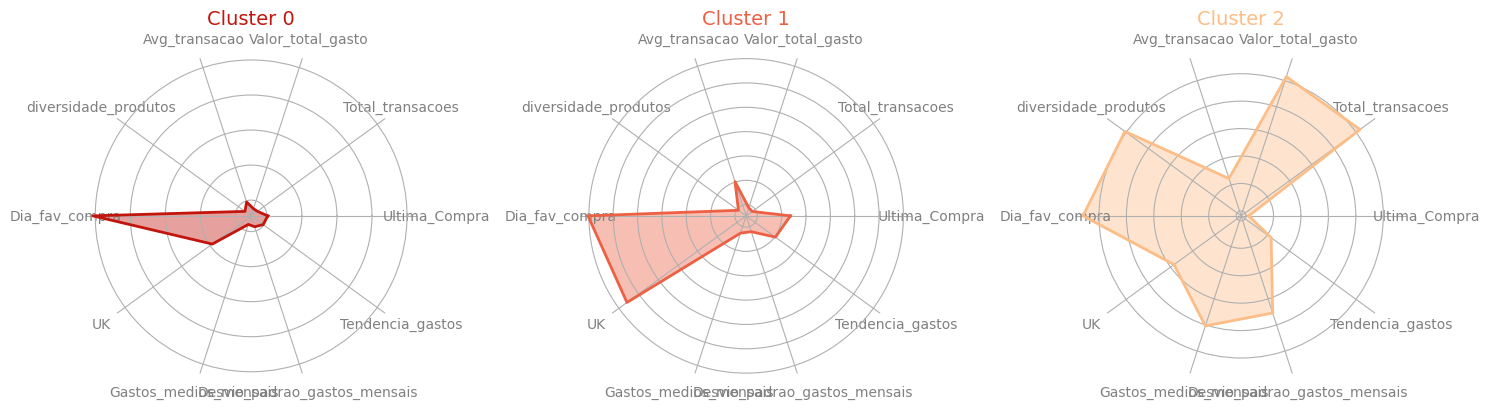

In [29]:
custom_colors = ['#c2150d', '#ed6044', '#fdbd86']

# Lista de rótulos para as variáveis
labels = dados_clientes.columns[:-1]

# Número de clusters
num_clusters = 3

# Crie subplots para 3 gráficos de radar
fig, axes = plt.subplots(1, num_clusters, figsize=(15, 5), subplot_kw={'polar': True})
fig.subplots_adjust(wspace=0.5)

# Função para criar o radar chart para um cluster
def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    
    # Add a title
    ax.set_title(f'Cluster {cluster}', size=14, color=color)

for cluster, ax in zip(range(num_clusters), axes):
    # Selecione os dados para o cluster atual
    cluster_data = dados_clientes[dados_clientes['Cluster'] == cluster].drop('Cluster', axis=1).mean().values

    # Complete o círculo com a primeira variável para criar um gráfico fechado
    values = np.concatenate((cluster_data, [cluster_data[0]]))

    # Ângulos para cada variável
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()

    # Adicione o primeiro ângulo no final para fechar o gráfico
    angles += angles[:1]

    # Plote o gráfico de radar com a função personalizada
    create_radar_chart(ax, angles, values, custom_colors[cluster], cluster)

    # Personalize o eixo polar
    ax.set_yticklabels([])  # Remova os rótulos do eixo y
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=10, color = 'grey')  # Reduza o tamanho das letras para as variáveis

    # Remova a borda externa do círculo
    ax.spines['polar'].set_visible(False)

# Ajuste o layout
plt.tight_layout()
plt.show()

## Gráfico de barras de cada Cluser

- Entender o comportamento de cada cluster para cada variável 

In [23]:
dados_insight['Cluster'] = dados_clientes['Cluster']

In [30]:
dados_insight

,Ultima_Compra,Total_transacoes,Valor_total_gasto,Avg_transacao,diversidade_produtos,Dia_fav_compra,UK,Gastos_medios_mensais,Desvio_padrao_gastos_mensais,Tendencia_gastos,Cluster
Cod_cliente,,,,,,,,,,,
12347,2,182,4310.00,23.68,103,1,0,615.714286,341.070789,4.486071,1
12348,75,27,1437.24,53.23,21,3,0,359.310000,203.875689,-100.884000,0
12349,18,72,1457.55,20.24,72,0,0,1457.550000,0.000000,0.000000,1
12350,310,16,294.40,18.40,16,2,0,294.400000,0.000000,0.000000,1
12352,36,77,1385.74,18.00,57,1,0,346.435000,120.042154,-2.682000,1
...,...,...,...,...,...,...,...,...,...,...,...
21821,1,2,3.35,1.68,2,3,1,3.350000,0.000000,0.000000,0
21822,1,634,5699.00,8.99,634,3,1,5699.000000,0.000000,0.000000,2
21823,0,730,6756.06,9.25,730,4,1,6756.060000,0.000000,0.000000,2


In [26]:
dados_insight = dados_insight.drop(columns = ['Unnamed: 0'])

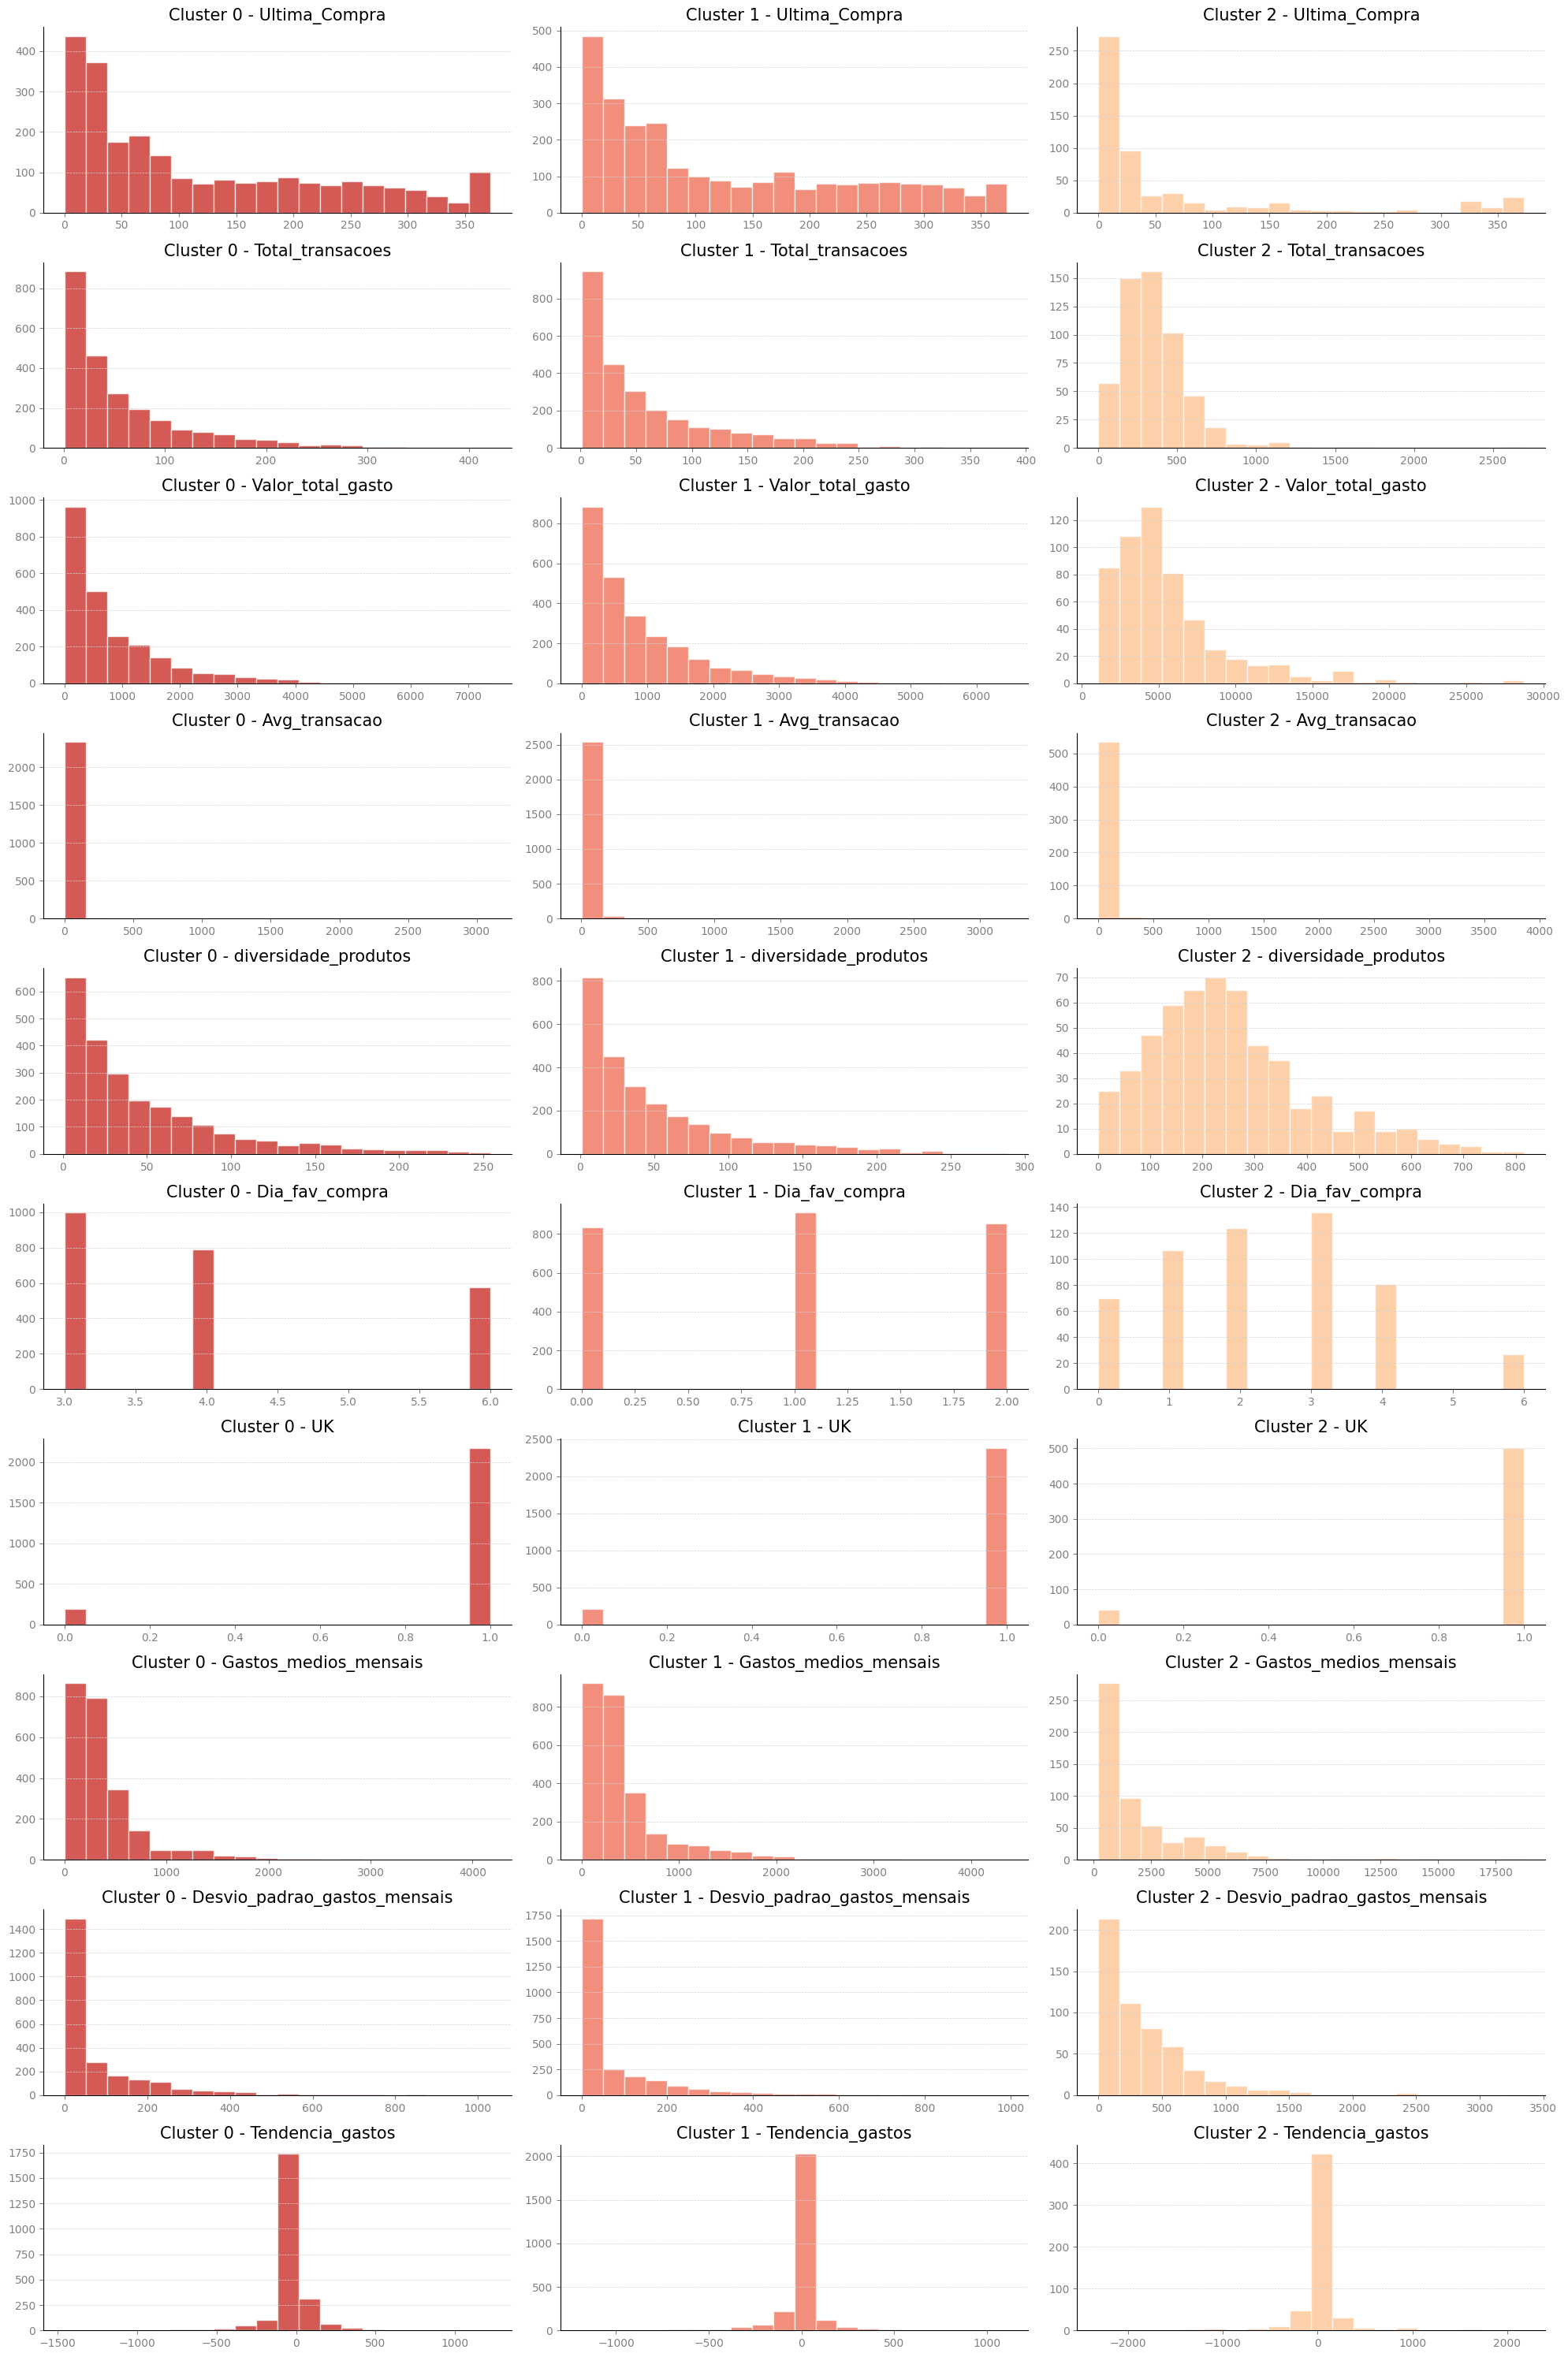

In [27]:
# Plot histograms for each feature segmented by the clusters with custom colors
features = dados_insight.columns[:-1]
clusters = dados_insight['Cluster'].unique()
clusters.sort()

# Defina as cores personalizadas
custom_colors = ['#c2150d', '#ed6044', '#fdbd86']

# Setting up the subplots with increased vertical spacing (hspace)
n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))

# Plotting histograms with custom colors
for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = dados_insight[dados_insight['Cluster'] == cluster][feature]
        ax = axes[i, j]
        ax.hist(data, bins=20, color=custom_colors[j], edgecolor='w', alpha=0.7)  # Use as cores personalizadas
        ax.set_title(f'Cluster {cluster} - {feature}', fontsize=15)
        ax.set_xlabel('')
        ax.set_ylabel('')
        
        # Remove a borda superior e direita
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        # Adicione linhas de grade finas em lightgrey
        ax.yaxis.grid(color='lightgrey', linestyle='dashed', linewidth=0.5)
        
        # Defina as cores dos ticks do eixo x e y como cinza
        ax.tick_params(axis='x', colors='gray')
        ax.tick_params(axis='y', colors='gray')

# Ajustando o layout para evitar sobreposições
plt.tight_layout()
plt.show()

# Avaliação dos Clusters

### Cluster 0:
- Clientes esporádicos que não possuem um intervalo de compra linear, variando bastante entre os clientes. No geral, fazem poucas compras e de valores baixos,;
- grupo que possui tendência de gastos negativa, o que representa uma aptidão menor a fazer novas compras e que o valor das compras tem diminuído. Necessita de uma estratégia da área de negócios para instigar esse público;
- Tendência maior de realizar compras ao findar da semana, mais especificamente as quintas, sextas e aos domingos;
- Aproximadamente 91% do segmento é formado por residentes do Reino Unido
- Valor médio por transação é R$ 23,00
-  85% no segmento tem gastos mensais superiores a R$ 100,00, com valor médio por transação na casa de 23,00
- Pouca diversidade de produtos

### Cluster 1:
- Apresentam um nível levemente mais moderado que o cluster 0, porém som muita frequência nas transações 
- Tendência de gastos positiva, o que indica que esse cluster tem aumentado a sua aptidão às compras e seus gastos ao longo do tempo
- Tendem a realizar as compras no início da semana, mais precisamente às segundas, terças e quartas;
- Aproximadamente 91% do segmento é formado por residentes do Reino Unido
- Valor médio por transação é maior que o do cluster 0, sendo aproximadamente R$ 27,00
- 85% do cluster possui gastos mensais acima de R$ 100 e valor médio por transação na casa de R$ 27,00
- Pouca diversidade de produtos


### Cluster 2:
- Clientes valiosos, com alta frequencia e valores gastos
- Valores totais gastos extremamente altos e alta diversidade de produtos 
- Valor médio por transação é R$ 39,00, R$ 12,00 maior do que o cluster 1
- elevado número de transações
- 97% do segmento possui mais do que 50 transações, enquanto o cluster 1 está na casa dos 39% e o cluster 0 de 38%
- Tendência de gastos positiva, o que indica que este cluster está aumentando o valor gasto nas aquisições
- Fazem compras todos os dias, porém com uma aptidão maior a realizar de terça à sexta;
- Alta variabilidade nos gastos mensais, indicado pelo desvio padrão, o que pode indicar uma menor previsibilidade, em relação aos outros clusters


In [78]:
dados_insight[dados_insight['Cluster'] == 0].loc[dados_insight['Gastos_medios_mensais'] > 100]

,Ultima_Compra,Total_transacoes,Valor_total_gasto,Avg_transacao,diversidade_produtos,Dia_fav_compra,UK,Gastos_medios_mensais,Desvio_padrao_gastos_mensais,Tendencia_gastos,Cluster
Cod_cliente,,,,,,,,,,,
12348,75,27,1437.24,53.23,21,3,0,359.310,203.875689,-100.884,0
12354,232,58,1079.40,18.61,58,3,0,1079.400,0.000000,0.000,0
12361,287,9,174.90,19.43,9,4,0,174.900,0.000000,0.000,0
12364,7,81,1208.10,14.91,69,4,0,302.025,211.406551,-64.654,0
12375,10,15,377.50,25.17,13,4,0,188.750,2.192031,-3.100,0
...,...,...,...,...,...,...,...,...,...,...,...
21750,8,13,311.97,24.00,13,3,0,311.970,0.000000,0.000,0
21753,7,68,588.24,8.65,68,4,1,588.240,0.000000,0.000,0
21758,7,42,198.26,4.72,42,4,1,198.260,0.000000,0.000,0


In [42]:
dados_insight['UK'].value_counts()

UK
1    5065
0     445
Name: count, dtype: int64

In [85]:
dados_insight[dados_insight['Cluster'] == 0]

,Ultima_Compra,Total_transacoes,Valor_total_gasto,Avg_transacao,diversidade_produtos,Dia_fav_compra,UK,Gastos_medios_mensais,Desvio_padrao_gastos_mensais,Tendencia_gastos,Cluster
Cod_cliente,,,,,,,,,,,
12348,75,27,1437.24,53.23,21,3,0,359.310,203.875689,-100.884,0
12353,204,4,89.00,22.25,4,3,0,89.000,0.000000,0.000,0
12354,232,58,1079.40,18.61,58,3,0,1079.400,0.000000,0.000,0
12361,287,9,174.90,19.43,9,4,0,174.900,0.000000,0.000,0
12364,7,81,1208.10,14.91,69,4,0,302.025,211.406551,-64.654,0
...,...,...,...,...,...,...,...,...,...,...,...
21771,5,1,7.95,7.95,1,6,1,7.950,0.000000,0.000,0
21772,5,10,29.51,2.95,10,6,1,29.510,0.000000,0.000,0
21820,1,7,17.90,2.56,7,3,1,17.900,0.000000,0.000,0


In [61]:
dados_insight[dados_insight['Cluster'] == 1].groupby('Cluster')['Gastos_medios_mensais'].mean()

Cluster
1    444.930466
Name: Gastos_medios_mensais, dtype: float64

In [81]:
dados_insight[dados_insight['Cluster'] == 2].loc[dados_insight['Total_transacoes'] > 50].count()

Ultima_Compra                   533
Total_transacoes                533
Valor_total_gasto               533
Avg_transacao                   533
diversidade_produtos            533
Dia_fav_compra                  533
UK                              533
Gastos_medios_mensais           533
Desvio_padrao_gastos_mensais    533
Tendencia_gastos                533
Cluster                         533
dtype: int64

In [82]:
dados_insight[dados_insight['Cluster'] == 1].loc[dados_insight['Total_transacoes'] > 50].count()

Ultima_Compra                   1026
Total_transacoes                1026
Valor_total_gasto               1026
Avg_transacao                   1026
diversidade_produtos            1026
Dia_fav_compra                  1026
UK                              1026
Gastos_medios_mensais           1026
Desvio_padrao_gastos_mensais    1026
Tendencia_gastos                1026
Cluster                         1026
dtype: int64

In [89]:
dados_insight[dados_insight['Cluster'] == 2].loc[dados_insight['Ultima_Compra'] < 30].count()

Ultima_Compra                   332
Total_transacoes                332
Valor_total_gasto               332
Avg_transacao                   332
diversidade_produtos            332
Dia_fav_compra                  332
UK                              332
Gastos_medios_mensais           332
Desvio_padrao_gastos_mensais    332
Tendencia_gastos                332
Cluster                         332
dtype: int64